In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("dataset/train.csv")
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [4]:
df.drop("id",axis=1,inplace=True) 
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


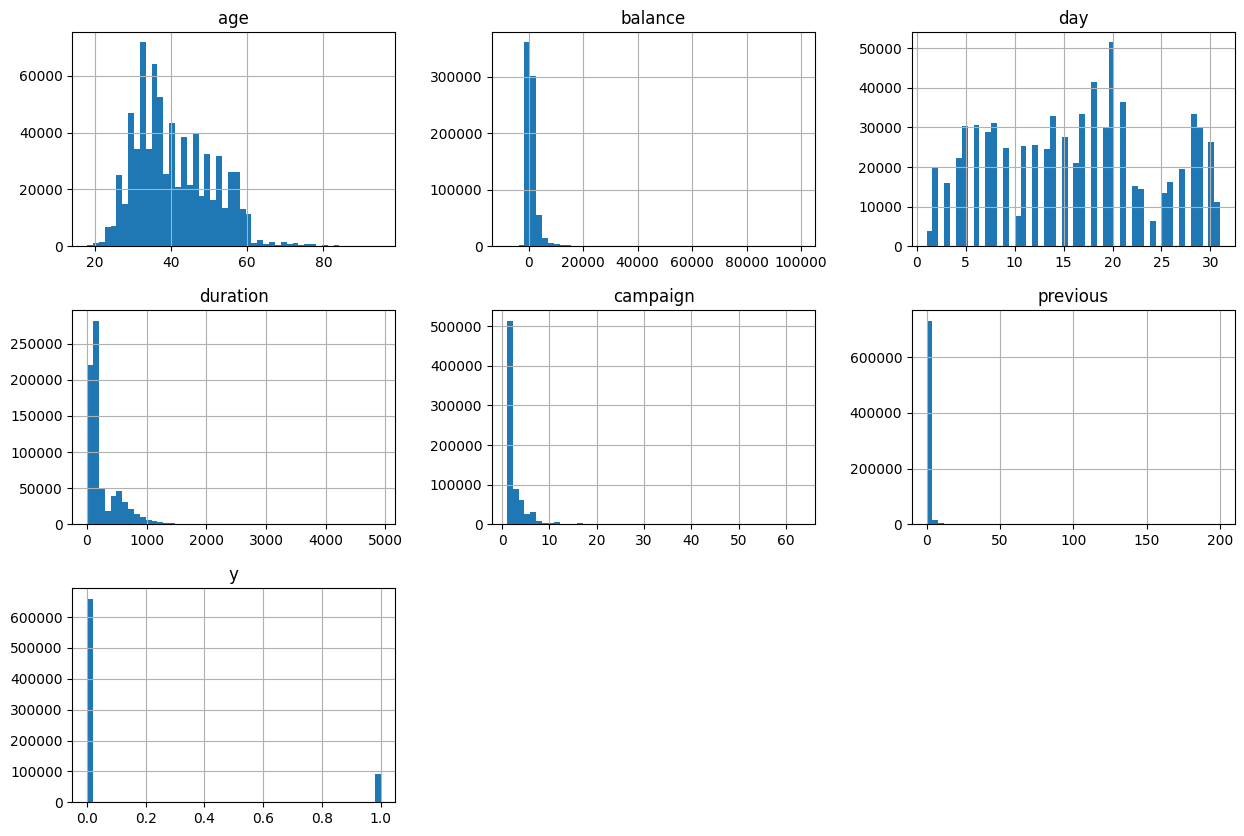

In [28]:
df.loc[:,["age","balance","day","duration","campaign","previous","y"]].hist(bins=50, figsize=(15,10))
plt.show()

In [ ]:
df.groupby('y')[['balance','duration']].mean().reset_index()

,y,balance,duration
0,0,1075.364679,203.803576
1,1,2142.103240,638.327226


In [8]:
# Getting frequency for categorical columns to understand 
def get_categorical_frequencies(df):
    from collections import defaultdict
    cat_dict = defaultdict(list)

    columns = df.columns 
    for col in columns:
        if df[col].dtype == 'object':
            curr_dict = df[col].value_counts().to_dict()
            for k, v in curr_dict.items():
                cat_dict['category'].append(col)
                cat_dict['value'].append(k)
                cat_dict['frequency'].append(v)
    return pd.DataFrame(cat_dict)

cat_df = get_categorical_frequencies(df)

cat_df.head()

,category,value,frequency
0,job,management,175541
1,job,blue-collar,170498
2,job,technician,138107
3,job,admin.,81492
4,job,services,64209


/var/folders/cc/xvz0pw_n3dvg2s2hgjg4byk80000gn/T/ipykernel_89875/3690098090.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=curr_df, y='value', x='frequency', ax=ax, palette='Set3')
/var/folders/cc/xvz0pw_n3dvg2s2hgjg4byk80000gn/T/ipykernel_89875/3690098090.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=curr_df, y='value', x='frequency', ax=ax, palette='Set3')
/var/folders/cc/xvz0pw_n3dvg2s2hgjg4byk80000gn/T/ipykernel_89875/3690098090.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=curr_df, y='value', x='freque

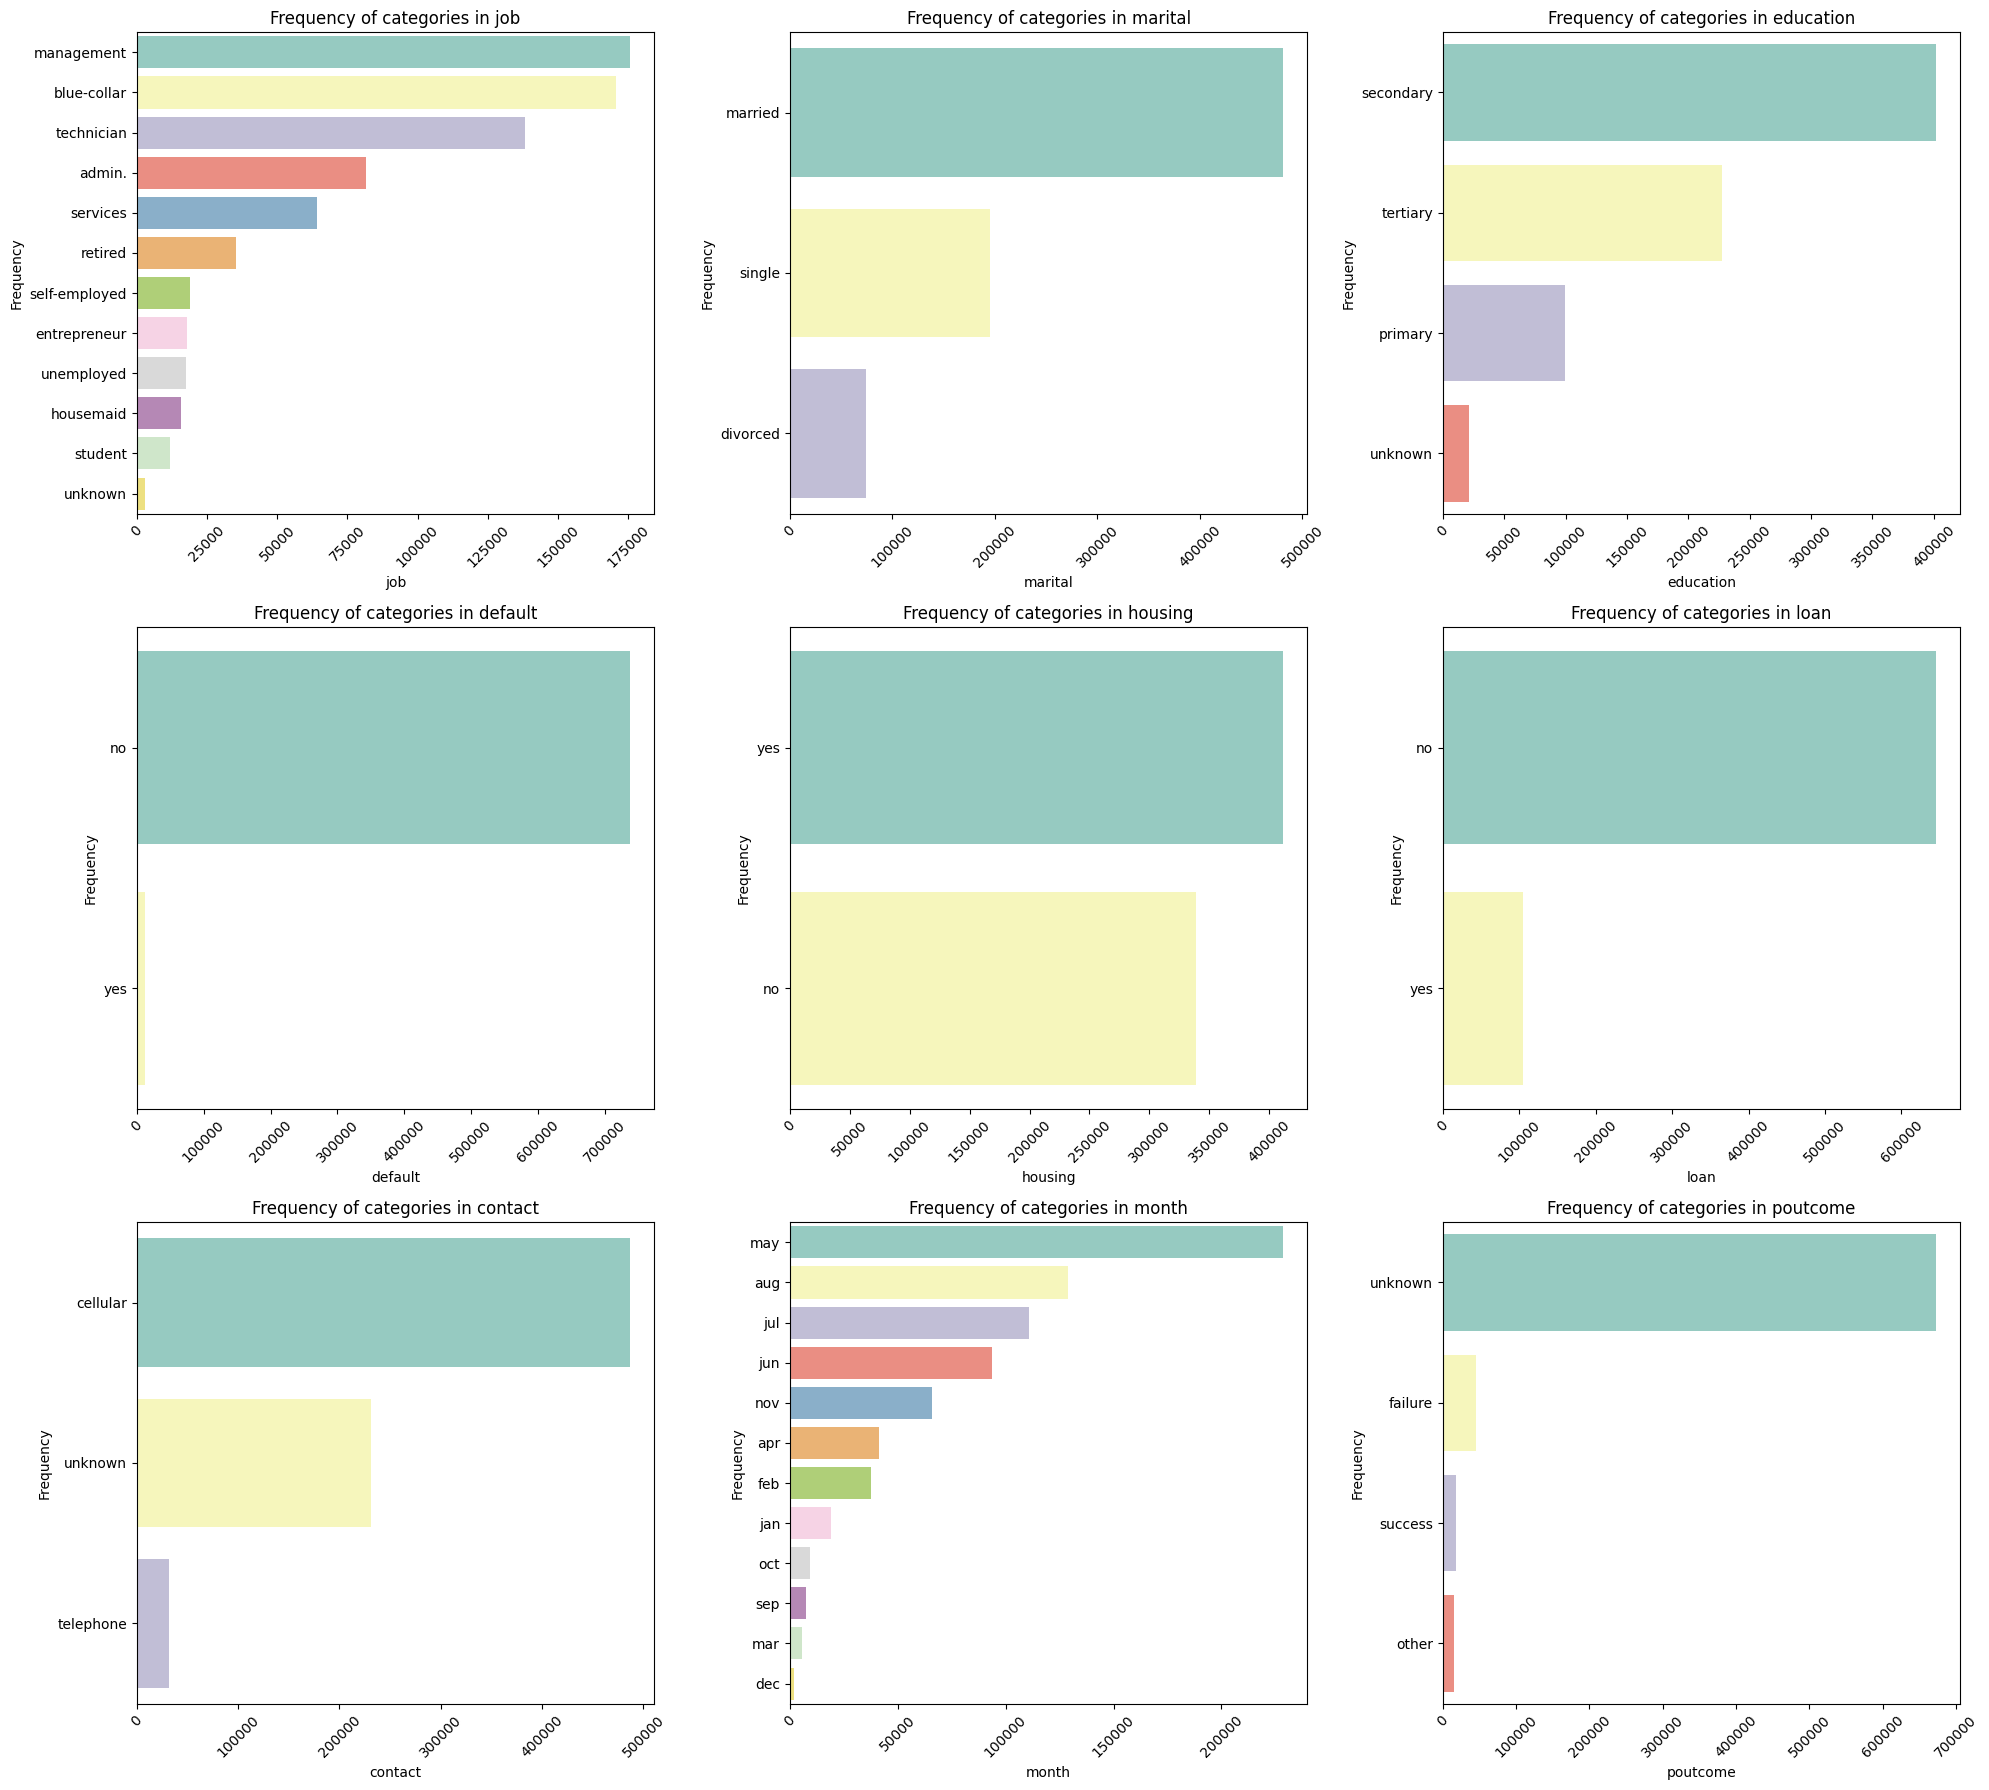

In [20]:
# Get only categorical columns
cat_columns = cat_df['category'].unique()
n_cols = len(cat_columns)

# Calculate grid dimensions
n_plot_cols = 3  # 3 columns in grid
n_plot_rows = (n_cols + n_plot_cols - 1) // n_plot_cols  # Ceiling division

# Create subplots - figsize needs to be a tuple (width, height)
fig, axes = plt.subplots(nrows=n_plot_rows, ncols=n_plot_cols, figsize=(20, 6*n_plot_rows))

# Flatten axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    ax = axes[i]
    curr_df = cat_df[cat_df['category'] == col]
    sns.barplot(data=curr_df, y='value', x='frequency', ax=ax, palette='Set3')
    ax.set_title(f'Frequency of categories in {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    
    # Optional: rotate x-labels if they're long
    ax.tick_params(axis='x', rotation=45)

# Hide empty subplots if n_cols isn't divisible by 3
for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

<Axes: >

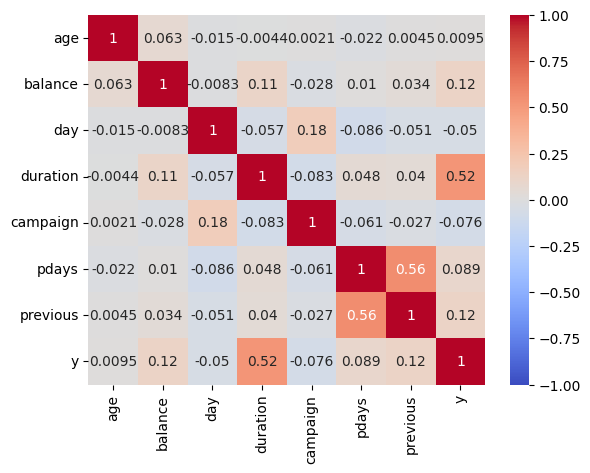

In [26]:
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
